In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [2]:
X = pd.read_csv("../Reducción descriptores/BBB_h.csv")

In [3]:
X.shape

(7807, 58)

In [4]:
X.fillna(method='ffill', inplace=True)


C:\Users\Eliud\AppData\Local\Temp\ipykernel_10184\419284443.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [5]:
df = pd.read_csv("../Descriptores calculados/BBB_descriptores.csv")

In [6]:
y = df["BBB+/BBB-"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipe = Pipeline([
    ('DM', DummyClassifier())
])

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('DC', DummyClassifier(strategy='most_frequent'))])

# Resultados del modelo
<hr>

In [11]:
y_predicha = pipe.predict(X_test)

In [12]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.641
Recall 0.641
precision 0.411
f1 0.501


c:\Users\Eliud\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
y_entrenamiento = pipe.predict(X_train)

In [14]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.633
Recall 0.633
precision 1.0
f1 0.491


# Confusion Matrix
<hr>

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [16]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

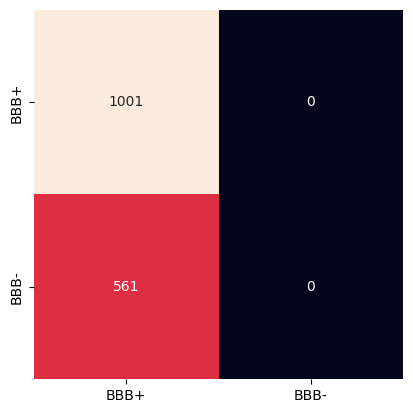

In [17]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

# Guardar modelo
<hr>

In [18]:
import joblib

In [19]:
joblib.dump(pipe, '../GuardadoDeModelos MD/modelo_DC.joblib')

['../GuardadoDeModelos MD/modelo_DC.joblib']